# Praca domowa 7
## Konstanty Kraszewski
Wykorzytanie algorytmu GMM do wykrywania próbek odstających.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')

### Wczytanie danych

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
val = pd.read_csv('val.csv')

### Wytrenowanie modelu

In [3]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture()
gmm.fit(train)

GaussianMixture()

### Ustalenie progu dla próbek odstających

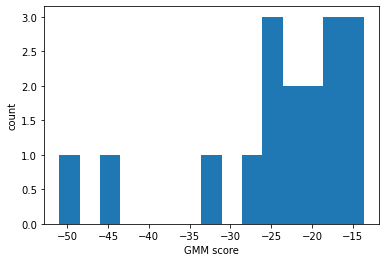

In [4]:
plt.hist(gmm.score_samples(val),bins=15)
plt.xlabel('GMM score')
plt.ylabel('count')
plt.show()

Na podstawie zbioru walidacyjnego ustalamy próg na -30.

### Ocena modelu

In [5]:
labels = (gmm.score_samples(test.iloc[:,1:])<-30) + 0

In [6]:
from sklearn.metrics import f1_score,precision_score,recall_score
print(f'''    Wyniki modelu

 f1-score: {f1_score(test['class'],labels):.4f}
precision: {precision_score(test['class'],labels):.4f}
   recall: {recall_score(test['class'],labels):.4f}''')

    Wyniki modelu

 f1-score: 0.9091
precision: 0.8333
   recall: 1.0000


### Wniosek
Wysokie wyniki trzech metryk pozwalają stwierdzić, że algorytm Gaussian Mixture rzeczywiście może być wykorzystany do wykrywanie próbek odstających.